In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Embedding, LSTM, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import RMSprop, SGD

import argparse

In [3]:
model = Sequential()
model.add(Dense(64,input_dim=20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
inputs = Input(shape=(20,))
x=Dense(64,activation='relu')(inputs)
x=Dense(64,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)

model=Model(inputs=inputs,outputs=predictions)
model

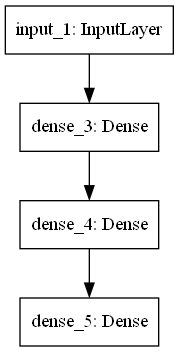

In [5]:
# from keras.utils import plot_model 
plot_model(model, to_file='model.png')

func1


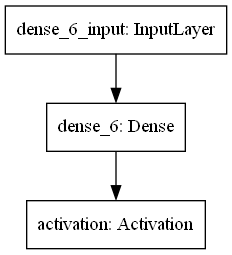

In [6]:
# def func1():
print("func1")
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
plot_model(model, to_file='keras-demo1.png')

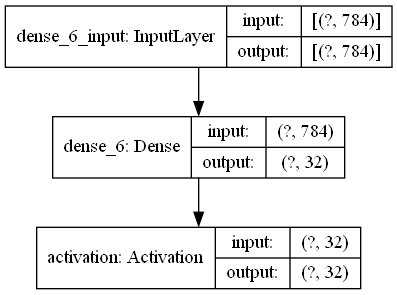

In [7]:
plot_model(model,show_shapes=True, to_file='keras-demo2.png')
# func1()

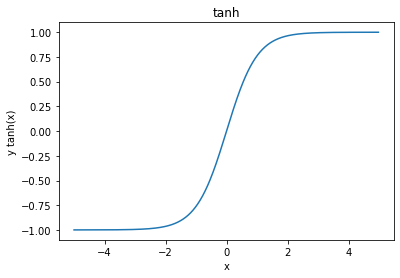

In [8]:
def func2():
    x = np.arange(-5.0, 5.0, 0.02)
    #y = np.sin(x)
    y=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

    plt.xlabel('x')
    plt.ylabel('y tanh(x)')
    plt.title('tanh')

    plt.plot(x, y)
    plt.show()
func2()

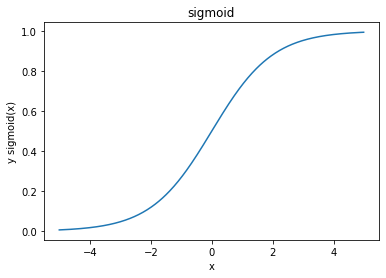

In [9]:
def func3():
    x = np.arange(-5.0, 5.0, 0.02)
    #y = np.sin(x)
    y=1/(1+np.exp(-x))

    plt.xlabel('x')
    plt.ylabel('y sigmoid(x)')
    plt.title('sigmoid')

    plt.plot(x, y)
    plt.show()
func3()

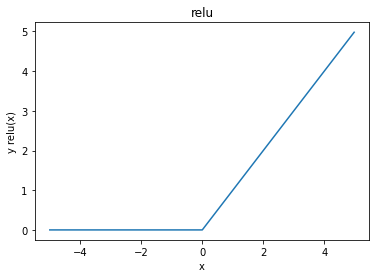

In [10]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0
def func4():
    x = np.arange(-5.0, 5.0, 0.02)
    y=[]

    for i in x:
        yi=relu(i)
        y.append(yi)

    plt.xlabel('x')
    plt.ylabel('y relu(x)')
    plt.title('relu')

    plt.plot(x, y)
    plt.show()
func4()

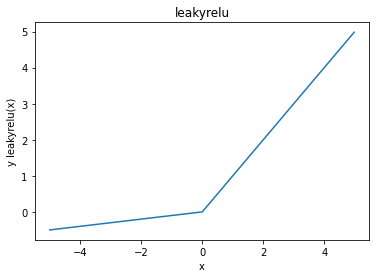

In [11]:
def leakyrelu(x):
    if x > 0:
        return x
    else:
        return x*0.1

def func5():
    x = np.arange(-5.0, 5.0, 0.02)
    y=[]

    for i in x:
        yi=leakyrelu(i)
        y.append(yi)

    plt.xlabel('x')
    plt.ylabel('y leakyrelu(x)')
    plt.title('leakyrelu')

    plt.plot(x, y)
    plt.show()
func5()

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

def func6():
    batch_size = 128
    num_classes = 10
    epochs = 20
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # 将图像数据从二维数组转换为一维数组，以适应神经网络的输入格式
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    plot_model(model, show_shapes=True, to_file='keras-mlp.png')

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
func6()

11493376/11490434 [==============================] - 43s 4us/step
60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2

In [18]:
from tensorflow.keras import backend as K

def func7():
    batch_size = 128
    num_classes = 10
    epochs = 12

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model.summary()
    plot_model(model, show_shapes=True, to_file='keras-cnn.png')

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

func7()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_______________________________________________

In [32]:
%%cmd

pip install --upgrade tensorflow


Microsoft Windows [�汾 10.0.22631.4602]
(c) Microsoft Corporation����������Ȩ����

(base) d:\Documents\��ؾ���\WebSecMLLearnNote\Code3>
(base) d:\Documents\��ؾ���\WebSecMLLearnNote\Code3>pip install --upgrade tensorflow
     ------------------------------------ 266.3/266.3 MB 349.6 kB/s eta 0:00:00
     ------------------------------------ 133.7/133.7 kB 129.6 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 175.5 kB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 227.0 kB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.9.0
    Uninstalling absl-py-0.9

ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'D:\\Anaconda\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



In [30]:
# import numpy as np
# from keras.datasets import imdb
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 加载IMDB数据集
max_features = 20000  # 词汇表大小
maxlen = 100  # 序列的最大长度
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 填充序列
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# 构建模型
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

# 评估模型
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
d:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
d:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' w

NotImplementedError: Cannot convert a symbolic Tensor (lstm_8/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:

def maidou_gan():
    def gan_generator_model():
        model = Sequential()
        model.add(Dense(input_dim=200, units=256))
        model.add(Activation('relu'))
        model.add(Dense(28*28*1))
        model.add(Activation('sigmoid'))

        model.add(Reshape((28, 28, 1), input_shape=(28*28*1,)))

        plot_model(model, show_shapes=True, to_file='keras-gan-generator_model.png')
        return model

    def gan_discriminator_model():
        model = Sequential()

        model.add(Reshape((28*28*1,), input_shape=(28, 28, 1)))
        model.add(Dense(units=256))
        model.add(Activation('relu'))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))

        plot_model(model, show_shapes=True, to_file='keras-gan-discriminator_model.png')
        return model

    def gan_generator_containing_discriminator(g, d):
        model = Sequential()
        model.add(g)
        d.trainable = False
        model.add(d)

        plot_model(model, show_shapes=True, to_file='keras-gan-gan_model.png')
        return model

    def gan_combine_images(generated_images):

        #print(generated_images.shape[0]

        num = generated_images.shape[0]
        width = int(math.sqrt(num))
        height = int(math.ceil(float(num) / width))
        shape = generated_images.shape[1:3]
        image = np.zeros((height * shape[0], width * shape[1]),
                         dtype=generated_images.dtype)
        for index, img in enumerate(generated_images):
            i = int(index / width)
            j = index % width
            image[i * shape[0]:(i + 1) * shape[0], j * shape[1]:(j + 1) * shape[1]] = \
                img[:, :, 0]
        return image

    def gan_train(BATCH_SIZE):
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        #把像素点转化成小数
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = X_train[:, :, :, None]
        X_test = X_test[:, :, :, None]

        print(X_train.shape)
        # X_train = X_train.reshape((X_train.shape, 1) + X_train.shape[1:])
        d = gan_discriminator_model()
        g = gan_generator_model()
        d_on_g = gan_generator_containing_discriminator(g, d)
        d_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
        g_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
        g.compile(loss='binary_crossentropy', optimizer='SGD')
        d_on_g.compile(loss='binary_crossentropy', optimizer=g_optim)
        d.trainable = True
        d.compile(loss='binary_crossentropy', optimizer=d_optim)
        for epoch in range(100):
            print("Epoch is", epoch)
            print("Number of batches", int(X_train.shape[0] / BATCH_SIZE))
            for index in range(int(X_train.shape[0] / BATCH_SIZE)):
                noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, 200))
                image_batch = X_train[index * BATCH_SIZE:(index + 1) * BATCH_SIZE]
                generated_images = g.predict(noise, verbose=0)
                if index % 200 == 0:
                    image = gan_combine_images(generated_images)
                    #之前为了处理方便 像素都是0-1的小数 这里需要还原成整数
                    image = image * 127.5 + 127.5
                    # 调试阶段不生成图片
                    Image.fromarray(image.astype(np.uint8)).save("gan/"+str(epoch)+"_"+str(index)+".png")
                X = np.concatenate((image_batch, generated_images))
                y = [1] * BATCH_SIZE + [0] * BATCH_SIZE
                d_loss = d.train_on_batch(X, y)
                print("batch %d d_loss : %f" % (index, d_loss))
                noise = np.random.uniform(-1, 1, (BATCH_SIZE, 200))
                d.trainable = False
                g_loss = d_on_g.train_on_batch(noise, [1] * BATCH_SIZE)
                d.trainable = True
                print("batch %d g_loss : %f" % (index, g_loss))
                if index % 100 == 0:
                    g.save_weights('gan_generator', True)
                    d.save_weights('gan_discriminator', True)

    print("maidou")
    gan_train(BATCH_SIZE=128)

maidou_gan()